# Supervised Learning

## 1) Regression

### 1-1) Linear Regression from scratch

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Step 1. Data Creation

## data ( height and weight of  adults and children)

In [19]:
m = 100
1/m 

0.01

In [20]:
adult_height = np.random.normal(175, 5, [m, 1])
adult_weight = np.random.normal(70, 5, [m, 1])

adult_dataset = np.concatenate( (adult_weight, adult_height) , axis = 1)

print(adult_dataset.shape)
print(adult_dataset[:5])

(100, 2)
[[ 70.37073925 177.43470605]
 [ 75.02481123 168.17202088]
 [ 73.44360648 176.70225987]
 [ 71.65844469 176.40085995]
 [ 64.79280014 181.37531192]]


In [21]:
child_height = np.random.normal(120, 5, [m, 1])
child_weight = np.random.normal(30, 5, [m, 1])

child_dataset = np.concatenate( (child_weight, child_height) , axis = 1)

print(child_dataset.shape)
print(child_dataset[:5])

(100, 2)
[[ 32.07837548 117.1081983 ]
 [ 33.01132317 114.99374682]
 [ 26.90495533 115.68593386]
 [ 27.74640789 129.50114583]
 [ 31.98408894 113.23744124]]


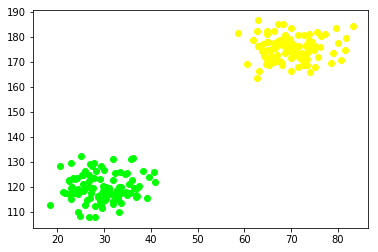

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(adult_dataset[:,0], adult_dataset[:,1], c=np.array([(1, 1, 0)]))
ax1.scatter(child_dataset[:,0], child_dataset[:,1], c=np.array([(0, 1, 0)]))
plt.show()

## Label

In [23]:
adult_label = np.ones( shape=[m, 1] )
child_label = np.zeros( shape=[m, 1] )
label = np.concatenate( (adult_label, child_label) )
print('label의 shape' , label.shape)
print(label[:10])

label의 shape (200, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


## Data + Label

In [24]:
total_dataset = np.concatenate((adult_dataset , child_dataset))
total_dataset = np.concatenate( (total_dataset, label), axis = 1  )

np.random.shuffle(total_dataset) # Shuffle dataset
print(total_dataset[:10])
print(total_dataset.shape)

[[ 22.85259704 119.71115999   0.        ]
 [ 65.0771776  178.1013041    1.        ]
 [ 22.45996022 117.14027163   0.        ]
 [ 36.79147473 116.70848946   0.        ]
 [ 68.12864147 168.8923771    1.        ]
 [ 71.02057776 173.29838426   1.        ]
 [ 37.07162073 116.33474588   0.        ]
 [ 34.72239662 117.78500669   0.        ]
 [ 22.88314175 115.21508403   0.        ]
 [ 32.41184965 125.61649395   0.        ]]
(200, 3)


## simple scaling of dataset

In [0]:
weight_mean= total_dataset[:, 0].mean()
height_mean= total_dataset[:, 1].mean()
total_dataset[:, 0] /= weight_mean
total_dataset[:, 1] /= height_mean

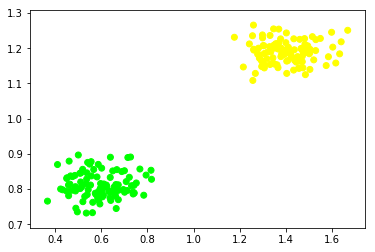

In [26]:
total_dataset.shape

fig = plt.figure()
ax1 = fig.add_subplot(111)
color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)
plt.show()

# Step 2. Model definition

In [0]:
def hypothesis(x, w, b):
    pred = np.matmul(x, w.T) + b
    return pred

In [0]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [0]:
def cost(x, w, b, y):
    loss = -y*hypothesis(x, w, b) + np.log(1 + np.exp(hypothesis(x, w, b))) #-y*h(x) + log(1+exp(h(x)))
    cost = (1/m)*np.sum(loss)
    return cost

In [0]:
def derivative(x, w, b, y):
    dw = -(1/m)* np.sum( x*(y - sigmoid(hypothesis(x, w, b))) , axis = 0) # 1 x w_dim
    db = -(1/m)* np.sum( y  - sigmoid(hypothesis(x, w, b)), axis = 0 )
    return dw, db

In [0]:
def update(x, w, b, y, alpha):
    w = w - alpha*(derivative(x, w, b, y)[0]) # w := w + alpha * dw
    b = b - alpha*(derivative(x, w, b, y)[1]) # b := b + alpha * db
    return w, b

# Step 3. Training model

In [0]:
# initialization of weights and bias
w = np.array([[0, 0]])
b = 0

x = total_dataset[:, :2] # x1, x2
y = total_dataset[:, 2:3] # label

## 아래 두 개 cell을 반복하여 실행하며, 선형 분류기의 위치 변화를 관찰해보세요.

In [41]:
for i in range(500):
    w, b = update(x, w, b, y, alpha=0.01)
    if i % 10 == 0:
        print ('cost =',cost(x, w, b, y))
        print ('w =',w)
        print ('b =',b)
        print ('\n')

cost = 0.6782880945736754
w = [[2.34426184 0.01995532]]
b = [-2.08685182]


cost = 0.675854462971392
w = [[2.35528801 0.01961753]]
b = [-2.09790425]


cost = 0.6734367325908787
w = [[2.3662778  0.01928304]]
b = [-2.10892084]


cost = 0.6710347644771022
w = [[2.3772314  0.01895184]]
b = [-2.11990178]


cost = 0.6686484210889239
w = [[2.38814902 0.01862389]]
b = [-2.13084728]


cost = 0.6662775662842368
w = [[2.39903085 0.01829917]]
b = [-2.14175753]


cost = 0.6639220653052322
w = [[2.40987709 0.01797766]]
b = [-2.15263273]


cost = 0.661581784763793
w = [[2.42068791 0.01765931]]
b = [-2.16347306]


cost = 0.6592565926270169
w = [[2.43146351 0.01734412]]
b = [-2.17427873]


cost = 0.6569463582028661
w = [[2.44220409 0.01703205]]
b = [-2.18504992]


cost = 0.6546509521259465
w = [[2.45290983 0.01672308]]
b = [-2.19578683]


cost = 0.652370246343416
w = [[2.46358092 0.01641717]]
b = [-2.20648963]


cost = 0.6501041141010194
w = [[2.47421754 0.01611432]]
b = [-2.21715853]


cost = 0.647852

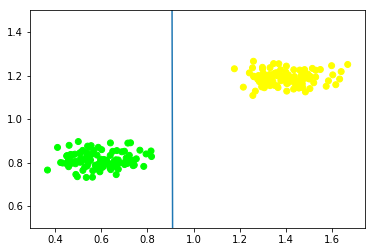

In [42]:
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
# ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)


# p1 = np.array([0, -b/w[0, 1]])
# p2 = np.array([-b/w[0, 0], 0])
# coefficients = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1) 
# polynomial = np.poly1d(coefficients)
# x_axis = np.linspace(0.5, 1.5)
# y_axis = polynomial(x_axis)
# ax1.set_ylim(0.5, 1.5)
# ax1.plot(x_axis, y_axis)

# plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)
color = [(1*i, 1, 0) for i in total_dataset[:,2] ]
ax1.scatter(total_dataset[:,0], total_dataset[:,1], c = color)


p1 = np.array([0, -b/w[0, 1]])
p2 = np.array([-b/w[0, 0], 0])
coefficients = np.polyfit([p1[0], p2[0][0]], [p1[1][0], p2[1]], 1)  
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0.5, 1.5)
y_axis = polynomial(x_axis)
ax1.set_ylim(0.5, 1.5)
ax1.plot(x_axis, y_axis)

plt.show()


In [44]:
print(w,b)

[[2.85364681 0.00665768]] [-2.59822833]


In [46]:
hypothesis([0.6,0.6],w,b)

array([-0.88204563])

In [47]:
hypothesis([0.9,1.0],w,b)

array([-0.02328852])

In [48]:
hypothesis([1.6,1.5],w,b)

array([1.97759309])